## KNN Approach



### Setup

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result

In [33]:
## adapt this directory to your needs
# TODO-> change path to be dynamic 
base_dir = '/home/bac/activity_prediction/implementation/'
data_dir = base_dir + 'data/'

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [34]:
nn_data_raw = pd.read_csv(data_dir+"ACHE/ache.csv")

nn_data_raw

,INDEX,NAME,Hydrophobic_Interaction:PHE297A,Pi-Cation_Interaction:TRP86A,Water_Bridge:GLY120A,Pi-Stacking:TRP86A,Hydrophobic_Interaction:TYR341A,Halogen_Bond:THR75A,Halogen_Bond:TRP286A,Hydrogen_Bond:ASN87A,...,Water_Bridge:THR83A,Hydrogen_Bond:GLN291A,Halogen_Bond:GLY120A,Water_Bridge:THR75A,Pi-Cation_Interaction:TYR341A,Hydrogen_Bond:SER125A,Water_Bridge:ALA204A,Pi-Stacking:TYR124A,Hydrophobic_Interaction:GLU202A,LABEL
0,1,CHEMBL397271|actives_final|sdf|151,0,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,2,CHEMBL481|actives_final|sdf|20,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
2,3,CHEMBL244230|actives_final|sdf|54,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
3,4,CHEMBL1094633|actives_final|sdf|85,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
4,5,CHEMBL191386|actives_final|sdf|308,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,CHEMBL576005|actives_final|sdf|279,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
999,1000,CHEMBL153865|actives_final|sdf|341,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1000,1001,CHEMBL146674|actives_final|sdf|297,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1001,1002,ZINC04195090|decoys_final2|sdf|324,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [42]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 5)                 680       
                                                                 
 dropout_37 (Dropout)        (None, 5)                 0         
                                                                 
 dense_51 (Dense)            (None, 10)                60        
                                                                 
Total params: 740 (2.89 KB)
Trainable params: 740 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
36/36 - 1s - loss: 2.1591 - accuracy: 0.4528 - val_loss: 2.0597 - val_accuracy: 0.5319 - 1s/epoch - 28ms/step
Epoch 2/150
36/36 - 0s - loss: 2.0183 - accuracy: 0.5490 - val_loss: 1.8978 - val_accuracy: 0.5674 - 281ms/epoch - 8ms/step
Epoch 3/150
36/36 - 0s - loss: 1.7975 - accuracy: 0.5686 - val_loss: 1.6631 - val_accuracy: 0.5461 - 300ms/epoch - 8ms/step
Epoch 4/150
36/36 - 0s - loss: 1.6155 - accuracy: 0.5455 - val_loss: 1.4353 - val_accuracy: 0.5461 - 295ms/epoch - 8ms/step
Epoch 5/150
36/36 - 0s - loss: 1.4501 - accuracy: 0.5686 - val_loss: 1.2578 - val_accuracy: 0.5461 - 320ms/epoch - 9ms/step
Epoch 6/150
36/36 - 0s - loss: 1.2712 - accuracy: 0.5882 - val_loss: 1.1242 - val_accuracy: 0.5461 - 295ms/epoch - 8ms/step
Epoch 7/150
36/36 - 0s - loss: 1.1562 - accuracy: 0.5882 - val_loss: 1.0151 - val_accuracy: 0.5461 - 333ms/epoch - 9ms/step
Epoch 8/150
36/36 - 0s - loss: 1.0799 - accuracy: 0.5793 - val_loss: 0.9125 - val_accuracy: 0.5603 - 321ms/epoch - 9ms/step
Epoch 9/15

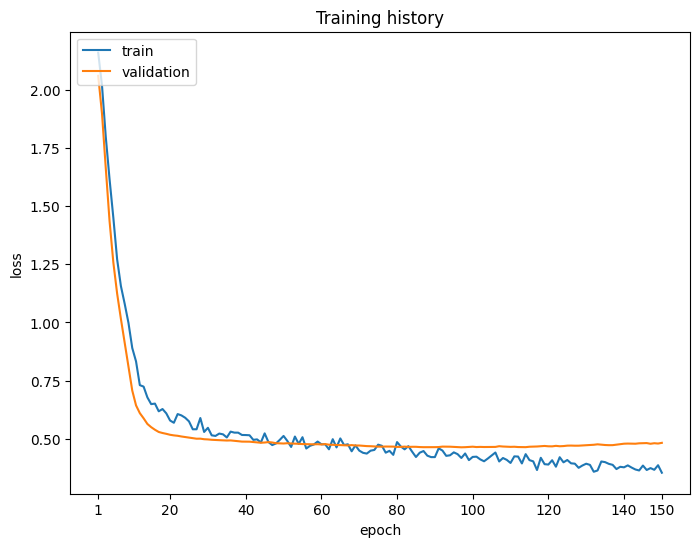

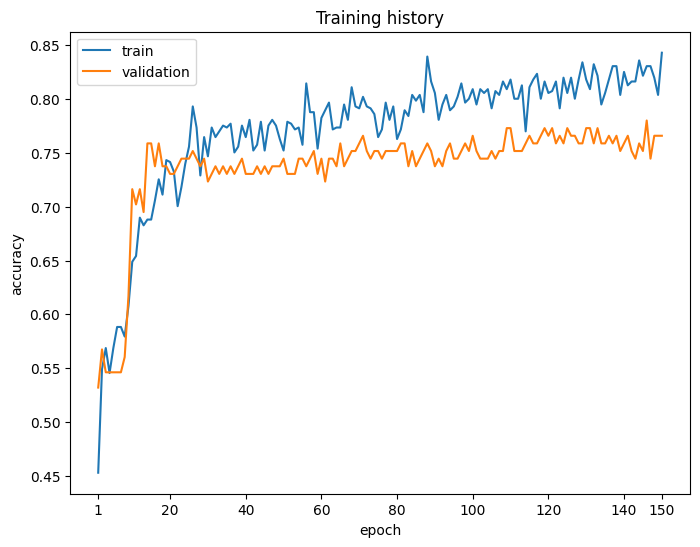

In [61]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

Evaluate Testdata using model

In [62]:
pred = model.predict(X_test)

evaluate_classification_result(y_test, pred, classes=nn_data["target_names"])


10/10 [==============================] - 0s 4ms/step
[[ 97  40]
 [ 27 137]]


Class inactive:
    Sensitivity (TPR):  70.803% (97 of 137)
    Specificity (TNR):  83.537% (137 of 164)
    Precision:          78.226% (97 of 124)
    Neg. pred. value:   77.401% (137 of 177)
Class active:
    Sensitivity (TPR):  83.537% (137 of 164)
    Specificity (TNR):  70.803% (97 of 137)
    Precision:          77.401% (137 of 177)
    Neg. pred. value:   78.226% (97 of 124)

Overall accuracy:   77.741% (234 of 301)
Balanced accuracy:  77.170%


array([[ 97,  40],
       [ 27, 137]])